## Masukan data

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold
data = pd.read_csv("data_category.csv",sep=';')

## baca data

In [2]:
data.head()

,religion,requestedprincipal,periodcount,gender,education,lengthofemployment,referencegender,monthlygrosssalary,residencestatus,maritalstatus,numberofdependents,employmentstatus,lineofbusiness,refrelationship,appclientage,label
0,1,2000000.0,30,1,1,6.0,1,16886186,1,1,2.0,1,1,1,1,1
1,1,1000000.0,30,2,2,5.0,2,3680000,2,2,1.0,2,19,2,2,1
2,1,3000000.0,10,1,2,1.0,1,4000000,2,2,1.0,2,17,8,3,1
3,1,2000000.0,30,2,2,5.0,2,5000000,2,3,0.0,1,15,2,2,1
4,3,2000000.0,30,1,1,6.0,1,8000000,2,3,0.0,1,23,2,3,1


## merubah data menjadi category

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13766 entries, 0 to 13765
Data columns (total 16 columns):
religion              13766 non-null int64
requestedprincipal    13766 non-null float64
periodcount           13766 non-null int64
gender                13766 non-null int64
education             13766 non-null int64
lengthofemployment    13766 non-null float64
referencegender       13766 non-null int64
monthlygrosssalary    13766 non-null int64
residencestatus       13766 non-null int64
maritalstatus         13766 non-null int64
numberofdependents    13766 non-null float64
employmentstatus      13766 non-null int64
lineofbusiness        13766 non-null int64
refrelationship       13766 non-null int64
appclientage          13766 non-null int64
label                 13766 non-null int64
dtypes: float64(3), int64(13)
memory usage: 1.7 MB


In [4]:
data['religion']= data['religion'].astype('category')
data['requestedprincipal']= data['requestedprincipal'].astype('int64')
data['periodcount']= data['periodcount'].astype('category')
data['gender']= data['gender'].astype('category')
data['education']= data['education'].astype('category')
data['lengthofemployment']= data['lengthofemployment'].astype('int64')
data['referencegender']= data['referencegender'].astype('category')
data['monthlygrosssalary']= data['monthlygrosssalary'].astype('category')
data['residencestatus']= data['residencestatus'].astype('category')
data['maritalstatus']= data['maritalstatus'].astype('category')
data['numberofdependents']= data['numberofdependents'].astype('int64')
data['employmentstatus']= data['employmentstatus'].astype('category')
data['lineofbusiness']= data['lineofbusiness'].astype('category')
data['refrelationship']= data['refrelationship'].astype('category')
data['appclientage']= data['appclientage'].astype('category')
data['label']= data['label'].astype('category')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13766 entries, 0 to 13765
Data columns (total 16 columns):
religion              13766 non-null category
requestedprincipal    13766 non-null int64
periodcount           13766 non-null category
gender                13766 non-null category
education             13766 non-null category
lengthofemployment    13766 non-null int64
referencegender       13766 non-null category
monthlygrosssalary    13766 non-null category
residencestatus       13766 non-null category
maritalstatus         13766 non-null category
numberofdependents    13766 non-null int64
employmentstatus      13766 non-null category
lineofbusiness        13766 non-null category
refrelationship       13766 non-null category
appclientage          13766 non-null category
label                 13766 non-null category
dtypes: category(13), int64(3)
memory usage: 562.0 KB


## Membagi fitur dengan kelas

In [6]:
X = data.drop('label', axis=1)
y = data['label']

In [7]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

## menampilkan kelas imbalanced

Good Applicant 11127
Bad Applicant 2639


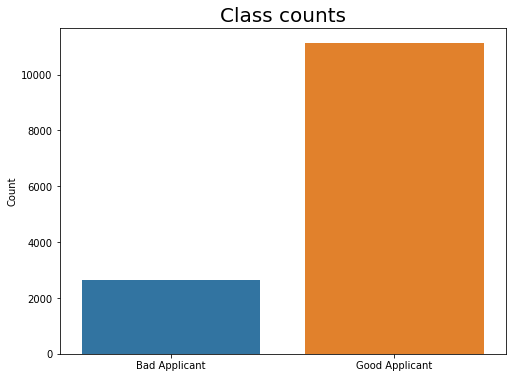

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get number of positve and negative examples
good = data[data["label"] == 1].shape[0]
bad = data[data["label"] == 0].shape[0]
print("Good Applicant",good)
print("Bad Applicant",bad)
plt.figure(figsize=(8, 6))
sns.countplot(data["label"])
plt.xticks((0, 1), ["Bad Applicant", "Good Applicant"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [11]:
print('Total data dari Train_X: {}'.format(X_train.shape))
print('Total data dari train_y: {} \n'.format(y_train.shape))
print('Total data dari Train_X: {}'.format(X_test.shape))
print('Total data dari train_y: {} \n'.format(y_test.shape))

Total data dari Train_X: (9636, 15)
Total data dari train_y: (9636,) 

Total data dari Train_X: (4130, 15)
Total data dari train_y: (4130,) 



In [8]:
print("Total data Test Good Applicant: {}".format(sum(y_test==1)))
print("Total data Test Bad Applicant: {} \n".format(sum(y_test==0)))

Total data Test Good Applicant: 3344
Total data Test Bad Applicant: 786 



=== Confusion Matrix ===
[[  67  719]
 [  72 3272]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.48      0.09      0.14       786
           1       0.82      0.98      0.89      3344

   micro avg       0.81      0.81      0.81      4130
   macro avg       0.65      0.53      0.52      4130
weighted avg       0.76      0.81      0.75      4130



Accuracy: 0.8084745762711865
f1_score: 0.8921608725289707
recall_score: 0.9784688995215312
auc score: 0.5318553149007147
[[  67  719]
 [  72 3272]]
Sensitivity 0.9784688995215312
Specificity 0.08524173027989822
Precision 0.8198446504635429


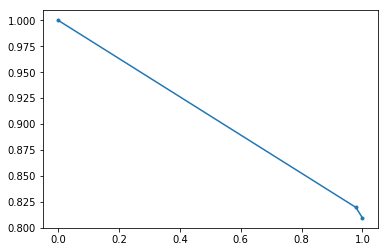

In [12]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
rfc =RandomForestClassifier(n_estimators=100, random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

# prediction on test set
rfc_predict=rfc.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))
print("f1_score:",metrics.f1_score(y_test, rfc_predict))
print("recall_score:",metrics.recall_score(y_test, rfc_predict))
print("auc score:",metrics.roc_auc_score(y_test, rfc_predict))
precision, recall, thresholds = metrics.precision_recall_curve(y_test, rfc_predict)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(recall, precision, marker='.')
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, rfc_predict)
print(confusion)

# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]
print("Sensitivity",TP / float(TP + FN))
print("Specificity",TN / float(TN + FP))
print("Precision",TP / float(TP + FP))


## oversampling dengan smote

In [13]:
from imblearn.over_sampling import SMOTENC
rus = SMOTENC(random_state=0,categorical_features=[0,2,3,4,6,7,8,9,11,12,13,14])
X_over, y_over = rus.fit_resample(X_train, y_train.ravel())

In [14]:
x_table_smotenc = pd.DataFrame(X_over)
y_table_smotenc = pd.DataFrame(y_over)
clean_loanbook = pd.concat([x_table_smotenc, y_table_smotenc], axis=1)
clean_loanbook = pd.DataFrame(clean_loanbook)

In [15]:
clean_loanbook.columns = [
    'religion',
    'requestedprincipal',
    'periodcount',
    'gender',
    'education',
    'lengthofemployment',
    'referencegender',
    'monthlygrosssalary',
    'residencestatus',
    'maritalstatus',
    'numberofdependents',
    'employmentstatus',
    'lineofbusiness',
    'refrelationship',
    'appclientage',
    'label'
]

Good Applicant 7783
Bad Applicant 7783


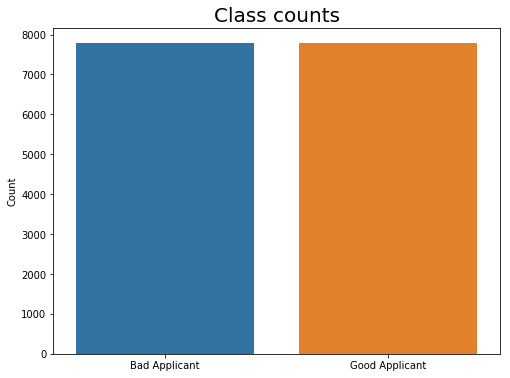

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get number of positve and negative examples
good = clean_loanbook[clean_loanbook["label"] == 1].shape[0]
bad = clean_loanbook[clean_loanbook["label"] == 0].shape[0]
print("Good Applicant",good)
print("Bad Applicant",bad)
plt.figure(figsize=(8, 6))
sns.countplot(clean_loanbook["label"])
plt.xticks((0, 1), ["Bad Applicant", "Good Applicant"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [19]:
print('Total data dari Train_X: {}'.format(X_over.shape))
print('Total data dari train_y: {} \n'.format(y_over.shape))

Total data dari Train_X: (15566, 15)
Total data dari train_y: (15566,) 



In [20]:
print("Total data Test Good Applicant: {}".format(sum(y_test==1)))
print("Total data Test Bad Applicant: {} \n".format(sum(y_test==0)))

Total data Test Good Applicant: 3344
Total data Test Bad Applicant: 786 



=== Confusion Matrix ===
[[ 147  639]
 [ 355 2989]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.29      0.19      0.23       786
           1       0.82      0.89      0.86      3344

   micro avg       0.76      0.76      0.76      4130
   macro avg       0.56      0.54      0.54      4130
weighted avg       0.72      0.76      0.74      4130



Accuracy: 0.7593220338983051
f1_score: 0.8574297188755019
recall_score: 0.8938397129186603
auc score: 0.5404313068410096
[[ 147  639]
 [ 355 2989]]
Sensitivity 0.8938397129186603
Specificity 0.18702290076335878
Precision 0.8238699007717751


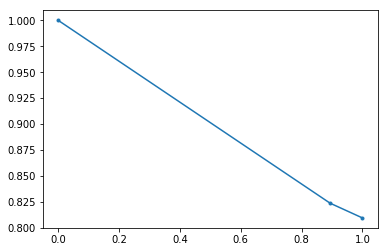

In [22]:
#Create a Gaussian Classifier
rfc =RandomForestClassifier(n_estimators=100, random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_over,y_over)

# prediction on test set
rfc_predict=rfc.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))
print("f1_score:",metrics.f1_score(y_test, rfc_predict))
print("recall_score:",metrics.recall_score(y_test, rfc_predict))
print("auc score:",metrics.roc_auc_score(y_test, rfc_predict))
precision, recall, thresholds = metrics.precision_recall_curve(y_test, rfc_predict)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(recall, precision, marker='.')
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, rfc_predict)
print(confusion)

# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]
print("Sensitivity",TP / float(TP + FN))
print("Specificity",TN / float(TN + FP))
print("Precision",TP / float(TP + FP))


## Undersample dengan imblearn

In [28]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0, replacement=True)
X_under, y_under = rus.fit_resample(X_train, y_train.ravel())

In [30]:
x_table_rus = pd.DataFrame(X_under)
y_table_rus = pd.DataFrame(y_under)
data_under = pd.concat([x_table_rus, y_table_rus], axis=1)
data_under = pd.DataFrame(data_under)

In [33]:
data_under.columns = [
    'religion',
    'requestedprincipal',
    'periodcount',
    'gender',
    'education',
    'lengthofemployment',
    'referencegender',
    'monthlygrosssalary',
    'residencestatus',
    'maritalstatus',
    'numberofdependents',
    'employmentstatus',
    'lineofbusiness',
    'refrelationship',
    'appclientage',
    'label'
]

Good Applicant 1853
Bad Applicant 1853


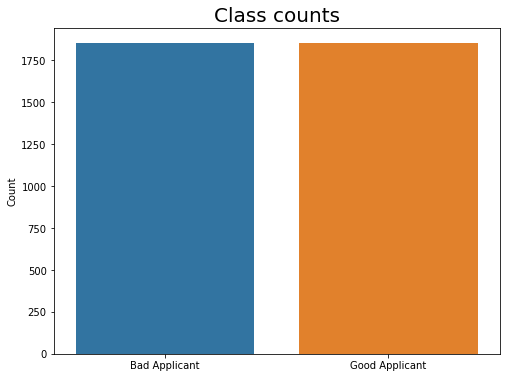

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Get number of positve and negative examples
good = data_under[data_under["label"] == 1].shape[0]
bad = data_under[data_under["label"] == 0].shape[0]
print("Good Applicant",good)
print("Bad Applicant",bad)
plt.figure(figsize=(8, 6))
sns.countplot(data_under["label"])
plt.xticks((0, 1), ["Bad Applicant", "Good Applicant"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

In [24]:
print('Total data dari Train_X: {}'.format(X_under.shape))
print('Total data dari train_y: {} \n'.format(y_under.shape))

Total data dari Train_X: (3706, 15)
Total data dari train_y: (3706,) 



In [27]:
print('Total data dari Train_X: {}'.format(X_train.shape))
print('Total data dari train_y: {} \n'.format(X_test.shape))

Total data dari Train_X: (9636, 15)
Total data dari train_y: (4130, 15) 



=== Confusion Matrix ===
[[ 504  282]
 [1519 1825]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.25      0.64      0.36       786
           1       0.87      0.55      0.67      3344

   micro avg       0.56      0.56      0.56      4130
   macro avg       0.56      0.59      0.51      4130
weighted avg       0.75      0.56      0.61      4130



Accuracy: 0.5639225181598063
f1_score: 0.6696019079068061
recall_score: 0.5457535885167464
auc score: 0.5934874812812739
[[ 504  282]
 [1519 1825]]
Sensitivity 0.5457535885167464
Specificity 0.6412213740458015
Precision 0.8661604176554343


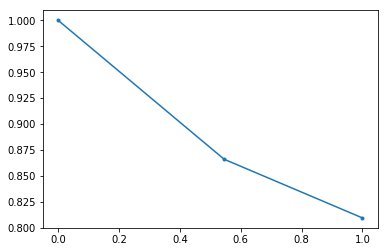

In [35]:
#Create a Gaussian Classifier
rfc =RandomForestClassifier(n_estimators=100, random_state=1)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_under,y_under)

# prediction on test set
rfc_predict=rfc.predict(X_test)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, rfc_predict))
print("f1_score:",metrics.f1_score(y_test, rfc_predict))
print("recall_score:",metrics.recall_score(y_test, rfc_predict))
print("auc score:",metrics.roc_auc_score(y_test, rfc_predict))
precision, recall, thresholds = metrics.precision_recall_curve(y_test, rfc_predict)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(recall, precision, marker='.')
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, rfc_predict)
print(confusion)

# True Positives
TP = confusion[1, 1]
# True Negatives
TN = confusion[0, 0]
# False Positives
FP = confusion[0, 1]
# False Negatives
FN = confusion[1, 0]
print("Sensitivity",TP / float(TP + FN))
print("Specificity",TN / float(TN + FP))
print("Precision",TP / float(TP + FP))


No handles with labels found to put in legend.


Index(['religion', 'requestedprincipal', 'periodcount', 'gender', 'education',
       'lengthofemployment', 'referencegender', 'monthlygrosssalary',
       'residencestatus', 'maritalstatus', 'numberofdependents',
       'employmentstatus', 'lineofbusiness', 'refrelationship',
       'appclientage'],
      dtype='object')


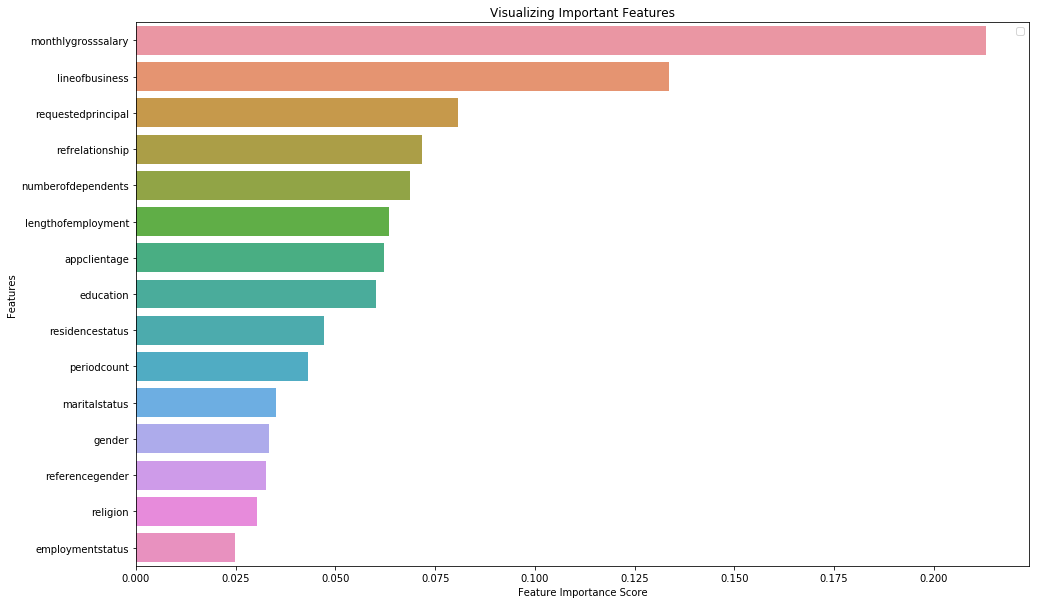

In [38]:
colname = data.columns[0:15]
print (colname)
import pandas as pd
feature_imp = pd.Series(rfc.feature_importances_,index=colname).sort_values(ascending=False)
feature_imp

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# the size of A4 paper
plt.figure(figsize=(16, 10))

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
from sklearn.tree import export_graphviz
# Extract single tree
estimator = rfc.estimators_[5]
# Export as ot file
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X.columns,
                class_names = str(y),
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [ ]:
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=300'])

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')